In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate

In [2]:
e2e_montecarlo = np.loadtxt("end_to_end_monte_carlo.txt", delimiter=",")
e2e_langevin = np.loadtxt("end_to_end_langevin.txt", delimiter=",")

In [3]:
def e2e_fn(x):
    return (3/(2 * np.pi))**(3/2) * np.exp(-3 * x**2/2)

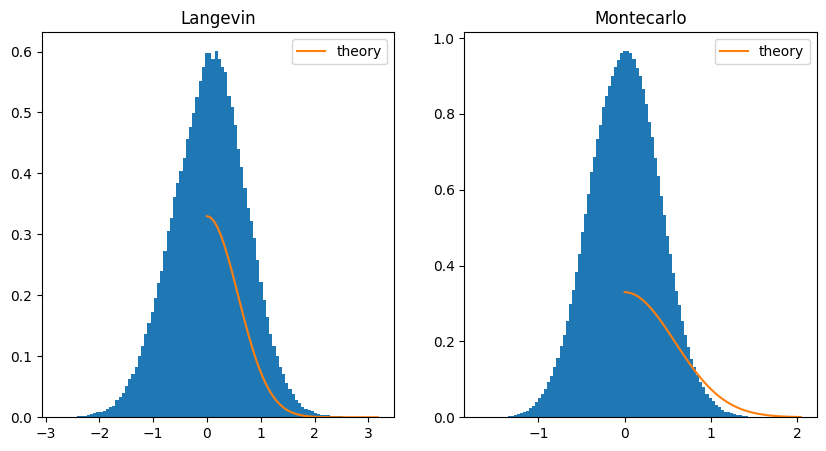

In [4]:
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.title("Langevin")

plt.hist(e2e_langevin[:,1], density=True, bins=100)

x = np.linspace(0, np.max(e2e_langevin))
plt.plot(x, e2e_fn(x), label="theory")
plt.legend()

plt.subplot(122)
plt.title("Montecarlo")

plt.hist(e2e_montecarlo[:,1], density=True, bins=100)

x = np.linspace(0, np.max(e2e_montecarlo))
plt.plot(x, e2e_fn(x), label="theory")

plt.legend()

plt.show()

In [5]:
def corr(data):
    corr = []
    corr.append(correlate(data[:,0], data[:,0], mode='full'))
    corr.append(correlate(data[:,1], data[:,1], mode='full'))
    corr.append(correlate(data[:,1], data[:,1], mode='full'))
    
    return np.average(corr, axis=0)/np.average(np.power(data, 2))

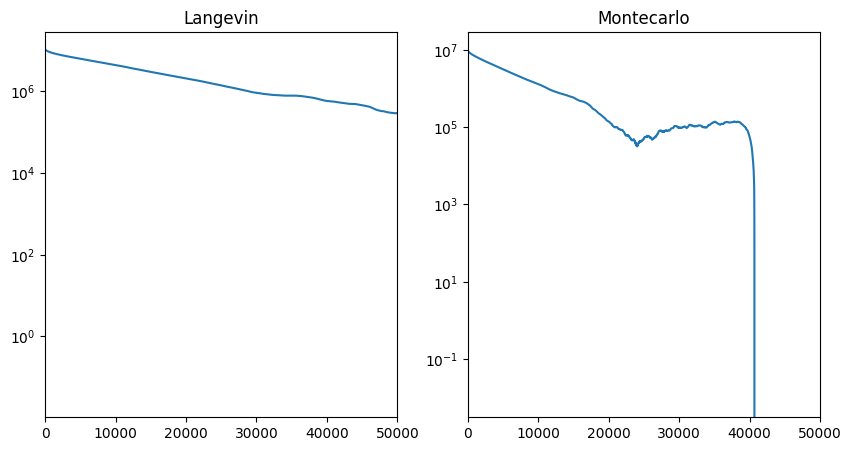

In [10]:
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.title("Langevin")

plt.xlim(0, 5* 1e4)
auto_corr = corr(e2e_langevin)
plt.plot(auto_corr[int(len(auto_corr)/2):])

plt.yscale("log")

plt.subplot(122)
plt.title("Montecarlo")

plt.xlim(0, 5*1e4)
auto_corr = corr(e2e_montecarlo)
plt.plot(auto_corr[int(len(auto_corr)/2):])

plt.yscale("log")

plt.show()